## Forces Between Cube Magnets - STL Mesh Based

H. Allag and J.-P. Yonnet, 3-D Analytical Calculation of the Torque and Force Exerted Between Two Cuboidal Magnets, IEEE Trans. Magn. 45, 3969 (2009).

This is a repeat of the force and torque calcuations performed on cubes, where the cube magnets `Prism` are replaced with imported stl files using the `Mesh` magnet type.

In [20]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    %pip install pymagnet -q
    print("Getting stl files")
    !mkdir stl
    !wget https://raw.githubusercontent.com/pdunne/pymagnet/main/examples/notebooks/STL%20Magnets/stl/HalfDonut.stl -O stl/HalfDonut.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/hollow_hex.stl -O stl/hollow_hex.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/star.stl -O stl/star.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/cube.stl -O stl/cube.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/pentagon_prism.stl -O stl/pentagon_prism.stl -q
    print("Done.")
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [21]:
import numpy as np
import pymagnet as pm
%matplotlib inline
# %matplotlib notebook

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
PI = np.pi
MU0= 4e-7*PI

A convenience function for plotting forces and torques:

In [22]:
def plot_force_result(offsets,f_total, spacing=None, compare=None, plot_type='force'):
    _,_ = plt.subplots(figsize=(8,8))
    
    if plot_type.lower() == 'torque':
        labels = [ r"$\tau_x$", r"$\tau_y$", r"$\tau_z$"]
    else:
        labels = [ r"$F_x$", r"$F_y$", r"$F_z$"]
    
    plt.plot(offsets,f_total[:,0], label=labels[0])
    plt.plot(offsets,f_total[:,1], label=labels[1])
    plt.plot(offsets,f_total[:,2], label=labels[2])
    
    if spacing is not None and compare is not None:
        plt.scatter(spacing,compare[0])
        plt.scatter(spacing,compare[1])
        plt.scatter(spacing,compare[2])

    plt.legend(loc='best')
    if plot_type.lower() == 'torque':
        plt.ylabel(r'$\tau$ (mN.m)')
    else:
        plt.ylabel(r'$F$ (N)')
    plt.xlabel(r"$d$ (mm)")
    plt.grid(True)
    plt.show()

In [23]:
def gen_mesh_test(path, file, offset = 0, Jr=1.0, theta=0, phi=0, alpha=0, beta=0, gamma=0, mask_magnet=False):
    pm.reset()

    center = (0,0,-10)

    m0 = pm.magnets.Mesh(
        path + file,
        Jr=Jr,
        center=center,
        mesh_scale = 5,
        theta=theta,
        phi=phi,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
    )
    

    center = (0.0 + offset, 0.0, 10)

    m1 = pm.magnets.Mesh(
        path + file,
        Jr=Jr,
        center=center,
        mesh_scale = 5,
        theta=theta,
        phi=phi,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
    )

    return m0, m1

In [24]:
path ='./stl/'
file = "cube.stl"

force_points = 101
f_total = np.zeros((force_points,3))
t_total = np.zeros((force_points,3))
offsets = np.linspace(-20,20,force_points)


for i in range(force_points):
        m0, m1 = gen_mesh_test(path, file, offset = offsets[i])
        f_total[i], t_total[i] = m0.get_force_torque(depth=4, unit='mm')

In [25]:
spacing = np.linspace(-20,20,41)
compare = np.zeros((3,41))
torque_compare = None
compare[0] = np.array([0.285,0.351,0.436,0.479,0.548,0.638,0.718,0.802,0.884,0.951,1.009,1.05,1.057,1.032,0.981,0.887,0.758,0.618,0.424,0.219,-0.008,-0.2,-0.416,-0.595,-0.749,-0.877,-0.972,-1.033,-1.049,-1.028,-0.999,-0.938,-0.882,-0.797,-0.725,-0.646,-0.569,-0.495,-0.42,-0.367,-0.317])
compare[1] = np.zeros(41)
compare[2] = np.array([0.106,0.09,0.067,0.035,-0.023,-0.076,-0.158,-0.264,-0.384,-0.526,-0.692,-0.876,-1.081,-1.298,-1.497,-1.702,-1.887,-2.041,-2.142,-2.224,-2.253,-2.221,-2.145,-2.031,-1.877,-1.702,-1.5,-1.288,-1.084,-0.871,-0.694,-0.52,-0.375,-0.266,-0.163,-0.085,-0.022,0.024,0.06,0.084,0.102])

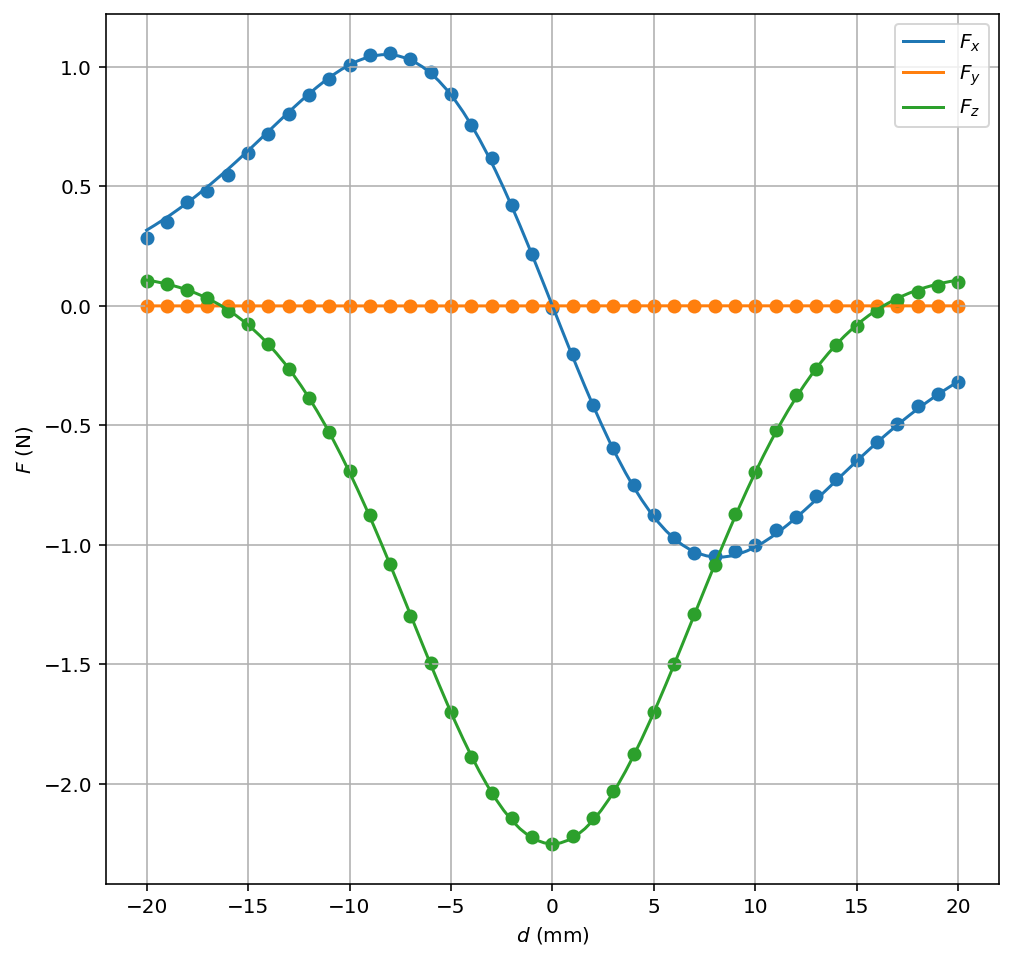

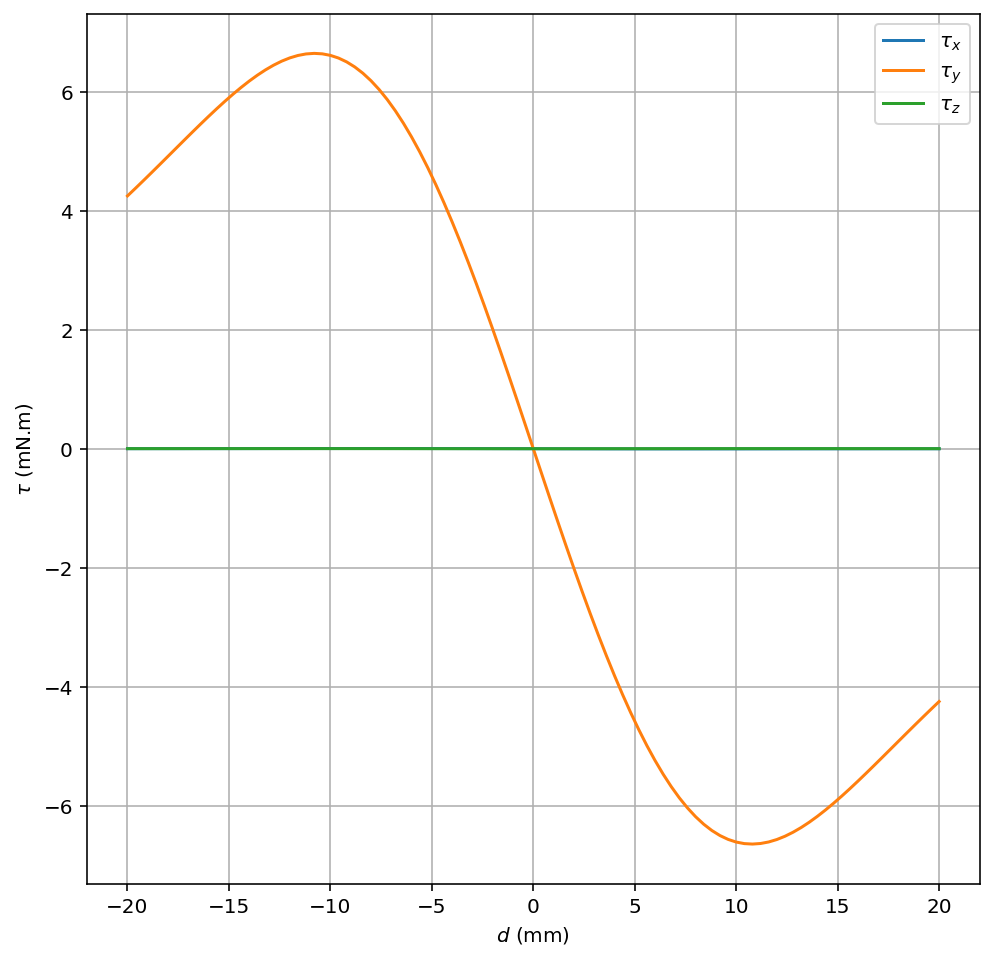

In [26]:
plot_force_result(offsets,f_total, spacing, compare, plot_type='force')
plot_force_result(offsets,t_total*1e3, spacing, torque_compare, plot_type='torque')

3D Render:

![Slice Plot](img/stl_example.png)

In [ ]:
m1, m2 = gen_mesh_test(path, file, offset = 6)
fig_slice, slice_cache, data_objects = pm.plots.slice_quickplot(cmax=0.5,
                                              num_levels=11,
                                              opacity=0.8,
                                              num_arrows=10,
                                              num_points=40,
                                              cone_opacity=0.9,
                                              magnet_opacity=1.0,
                                              mask_magnet = False,
                                              show_magnets=True,
                                              max1 = 30,
                                              max2 = 30,
                                              slice_value= 0.0,
                                              unit = 'mm'
                               )